In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Introduction

## Summary

The Space-Eye classification dataset consists of PlanetScope satellite images which correspond to the two classes "ship" and "non-ship". They were collected from the the Miami coast for the year 2017. The files are organized as follows:

- "non-ships/{id_number}/"
- "ships/{id_number}/"
- "nonshipsAIS_2017_Zone17.csv"
- "shipsAIS_2017_Zone17.csv"

each image subfolder holds multiple files:

- "{filename}_3B_AnalyticMS_clip.tif"
- "{filename}_3B_AnalyticMS_clip_toar.tif"
- "{filename}_3B_AnalyticMS_clip_tc.tif"
- "{filename}_3B_AnalyticMS_DN_udm_clip.tif"
- "{filename}_3B_AnalyticMS_metadata_clip.tif"
- "{filename}_manifest.json"
- "{filename}_metadata.json"

The .csv files hold additional information on the images ordered by their id numbers including the original GPS position.  This is especially relevant for the "ship" class, where a lot of additional information on the ships in question is povided. This includes the ship size, and if it is currently anchored or underway. This data can be used for additional model evaluation.

The "{filename}_3B_AnalyticMS_clip.tif" is the original 4 band satellite image holding all 4 channels in bgrn- order (blue, green, red, near infrared). 
The "{filename}_3B_AnalyticMS_clip_toar.tif" is the reflectance corrected 4 band satellite image holding all 4 channels in bgrn- order (blue, green, red, near infrared).
The "{filename}_3B_AnalyticMS_clip_toar.tif" is the reflectance and color corrected 4 band satellite image holding all 4 channels in bgrn- order (blue, green, red, near infrared).
The "{filename}_3B_AnalyticMS_DN_udm_clip.tif" is the usable data bitmap for each image.

The other files are not relevant to you but are included in case you want to dive deep into satellite image preprocessing. They are all described here:
https://assets.planet.com/docs/Planet_PSScene_Imagery_Product_Spec_June_2021.pdf

The images were downloaded and labeled using the approach documented here:
https://towardsdatascience.com/creating-a-dataset-to-spot-refugee-boats-in-the-mediteranean-449e86e2d4b2

**This means that there are possible mis-classifications!**

This includes images labeled non-ship including ships which were not in the AIS database and ship images where the ship is not visible due to either errors in AIS or cloud coverage.

## The .csv files

I'm very sorry that the non-ship .csv file is slightly corrupted. The missing information could be obtained by looking at the corresponding id metadata file. It is probably not relevant for your studies.
Additional information on the ship .csv file can be found here: https://marinecadastre.gov/ais/

In [ ]:
import pandas as pd
from pathlib import Path

Mounted at /content/drive


In [ ]:
#pd.read_csv(Path("C:\\Users\\eliwi\\Documents\\03_Ehrenamt\\07_Code\\Forschung\\nonshipsAIS_2017_Zone17.csv"), index_col="newindex")

pd.read_csv(Path("/content/drive/MyDrive/OTH/space-eye/dataset/nonshipsAIS_2017_Zone17.csv"), index_col="newindex")

,BaseDateTime,coordinate,envelope
newindex,,,
0,2017-01-24T15:12:39,POINT (-79.96306089485499 25.95716228633267),POLYGON ((-79.98306089485499 25.93716228633267...
1,2017-01-24T15:11:17,POINT (-80.13777711483885 25.69958150968701),POLYGON ((-80.15777711483885 25.67958150968702...
2,2017-01-24T15:11:29,POINT (-80.00431839136461 25.95282096076495),"POLYGON ((-80.0243183913646 25.93282096076495,..."
3,2017-01-24T15:11:29,POINT (-80.08197273807843 26.03648543466907),POLYGON ((-80.10197273807843 26.01648543466908...
4,2017-01-24T15:12:12,POINT (-80.02602954859496 26.1708076982523),"POLYGON ((-80.04602954859496 26.1508076982523,..."
...,...,...,...
867,NaN,NaN,NaN
868,NaN,NaN,NaN
869,NaN,NaN,NaN


In [ ]:
#pd.read_csv(Path("C:\\Users\\eliwi\\Documents\\03_Ehrenamt\\07_Code\\Forschung\\shipsAIS_2017_Zone17.csv"), index_col="newindex")
pd.read_csv(Path("/content/drive/MyDrive/OTH/space-eye/dataset/shipsAIS_2017_Zone17.csv"), index_col="newindex")


,BaseDateTime,COG,CallSign,Cargo,Draft,Heading,IMO,LAT,LON,Length,MMSI,SOG,Status,VesselName,VesselType,Width,coordinate,datetime,envelope
newindex,,,,,,,,,,,,,,,,,,,
0,2017-01-24T15:12:39,176.9,KCHV,80.0,12.2,179.0,IMO9353591,26.00165,-79.99460,183.20,366539000.0,5.7,under way using engine,OVERSEAS ANACORTES,1024.0,32.20,POINT (-79.99460000000001 26.00165),2017-01-24 15:12:39,"POLYGON ((-80.0146 25.98165, -79.9746000000000..."
1,2017-01-24T15:11:17,74.0,9HA3697,NaN,3.9,69.0,IMO9571143,25.75847,-80.10582,72.00,229894000.0,7.1,moored,AXIOMA,1019.0,11.80,POINT (-80.10581999999999 25.75847000000001),2017-01-24 15:11:17,POLYGON ((-80.12581999999999 25.73847000000001...
2,2017-01-24T15:11:29,175.3,KCHV,80.0,12.2,178.0,IMO9353591,26.00354,-79.99469,183.20,366539000.0,5.7,under way using engine,OVERSEAS ANACORTES,1024.0,32.20,POINT (-79.99469000000001 26.00354),2017-01-24 15:11:29,"POLYGON ((-80.01469 25.98354, -79.974690000000..."
3,2017-01-24T15:11:29,89.5,WDA5463,0.0,0.0,511.0,NaN,26.09297,-80.08075,0.00,495270931.0,19.8,undefined,PILOTN0;4,0.0,0.00,POINT (-80.08074999999999 26.09297),2017-01-24 15:11:29,"POLYGON ((-80.10074999999999 26.07297, -80.060..."
4,2017-01-24T15:12:12,-185.0,WDF2460,57.0,NaN,339.0,IMO9575876,26.12215,-80.07312,37.95,367428330.0,0.2,at anchor,LAURIE ANN REINAUER,1025.0,11.55,POINT (-80.07311999999997 26.12215),2017-01-24 15:12:12,"POLYGON ((-80.09311999999997 26.10215, -80.053..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,2017-12-31T15:19:29,-164.5,WDH2613,NaN,NaN,257.0,NaN,25.76596,-80.08091,17.59,367599420.0,10.5,under way using engine,SPLINTER,1019.0,5.00,POINT (-80.08091 25.76596),2017-12-31 15:19:29,"POLYGON ((-80.10091 25.74596, -80.060910000000..."
868,2017-12-31T15:19:21,-161.6,WDG9138,0.0,NaN,252.0,NaN,25.76410,-80.08799,46.09,367180940.0,7.9,under way using engine,USHER,1019.0,8.70,POINT (-80.08799 25.7641),2017-12-31 15:19:21,"POLYGON ((-80.10799 25.7441, -80.0679900000000..."
869,2017-12-31T15:18:26,-164.0,WDH2613,NaN,NaN,256.0,NaN,25.76733,-80.07779,17.59,367599420.0,10.2,under way using engine,SPLINTER,1019.0,5.00,POINT (-80.07779000000002 25.76733),2017-12-31 15:18:26,"POLYGON ((-80.09779000000002 25.74733, -80.057..."


## The reflectance corrected images

Reflectance correction signifies to adjust the image brightness by the angle and current position of the sun in relationship to the satellite. This is already done for you and I strongly suggest you to use the reflectance corrected images.
If you're interested in knowing more I suggest reading this: 
https://developers.planet.com/tutorials/convert-planetscope-imagery-from-radiance-to-reflectance/

As already mentioned each image has 4 channels - blue, green, red and near-infrared. This means, that it can't be saved in the typical image formats we all know. Instead it's saved as .tif image (acutally a geotif). So we need some more tools to read in the image, but we get a fourth channel and a lot of additional information than for normal .png's or .jpg's.

To open the images you can use rasterio. (If you find another one please let me know!)

In [ ]:
!pip install -q rasterio

     |████████████████████████████████| 19.3 MB 1.4 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path
import numpy as np

In [ ]:
#img_fn = Path("C:\\Users\\eliwi\\Documents\\03_Ehrenamt\\07_Code\\Forschung\\ships\\2\\20170124_151214_0e20_3B_AnalyticMS_clip_toar.tif")
img_fn = Path("/content/drive/MyDrive/OTH/space-eye/dataset/org_images/ships/2/20170124_151214_0e20_3B_AnalyticMS_clip.tif")
src_ds = rasterio.open(img_fn)
data = src_ds.read()

In [ ]:
data.shape

(4, 1488, 1347)

The first axis corresponds to the channels - be aware this is different from many common axis orderings!


So we have to change the channel ordering:

In [ ]:
# changing the axis order
data = data.swapaxes(0,2).swapaxes(0,1)

In [ ]:
data.shape

(1488, 1347, 4)

The data is scaled by a factor of 10.000 - dividing by 10.000 leaves us in the range of 0-1.
(There could be some outliers - invalid points with values higher than 1. You can simply clip those to the value of 1, if you want to be super correct, you can use the udm file to mask out unusable pixels)

In [ ]:
data = data/10000

Now for plotting we only need the rgb channels (and them in the correct order):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


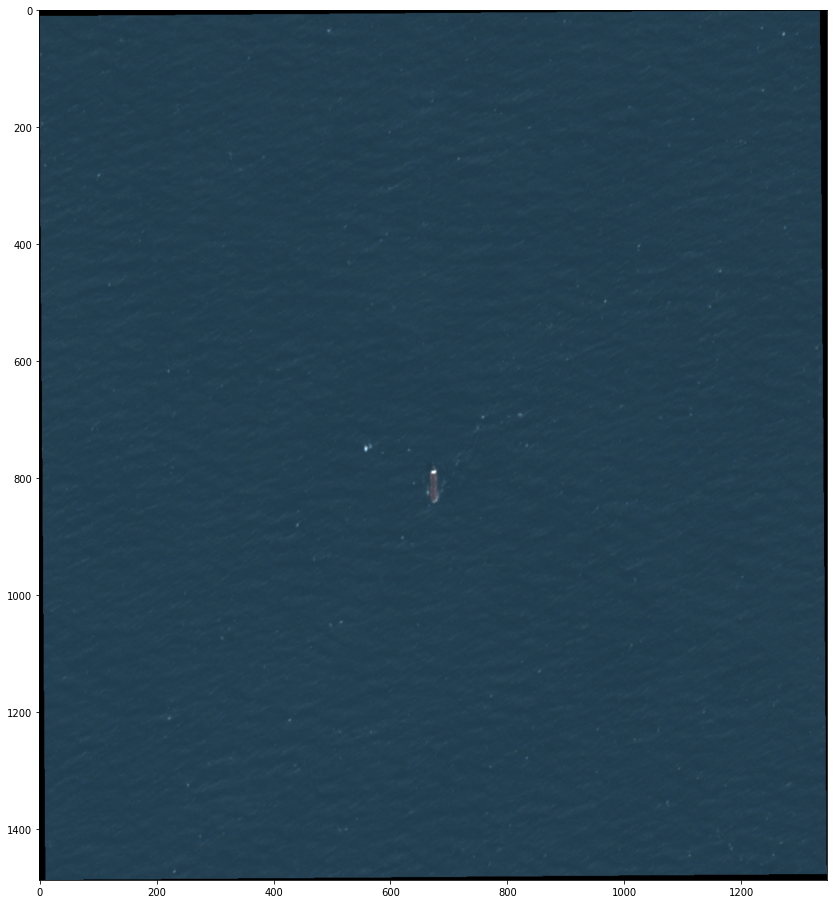

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(data[:,:,[2,1,0]])

Here's your ship :)

The images all have approximateley the same dimensions, but width and height can vary by a few pixels. The ships are (or at least should be) centered in the images. Therefore I strongly suggest you to use just the middle of the image, for example the middle 400 pixels. If you want to use this for data augmentation you can randomize the crop by some pixels. Here's an example function to use the middle, randomized by 25 pixels which it can move to any side:

In [ ]:
def crop_middle(data: np.array, size=400, randomnes=25):
    rows = data.shape[0]
    cols = data.shape[1]
    mid_row = int(rows/2)
    mid_col = int(cols/2)
    start_row = mid_row - int(size/2)
    start_col = mid_col - int(size/2)
    col_dist, row_dist = np.random.randint(low=-randomnes, high=randomnes, size=2)
    start_row += row_dist
    start_col += col_dist
    data = data[start_row : start_row+size, start_col: start_col+size,:]
    return data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


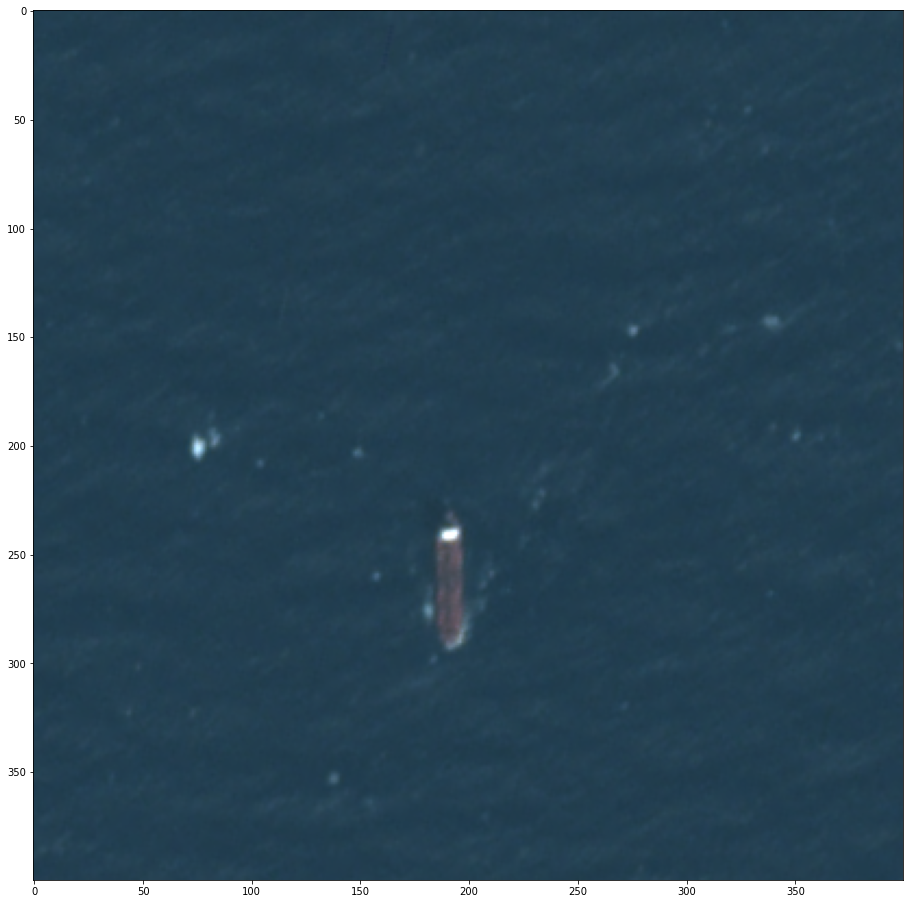

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(crop_middle(data)[:,:,[2,1,0]])

And that's it! Please keep in mind, that if you're using a ImageNet pretrained structure you still have to normalize the image. (and probably for everything else as well)

## Color corrected images

The "{filename}_3B_AnalyticMS_clip_toar.tif"  image is color corrected in addition to the reflectance correction. That means we adapted the RGB channels of the image so the color distribution is closer to that of typical non-satellite images. We suspect this to help when using pretrained networks. You can just try those as well, maybe it helps. It's not tested yet :)

In [ ]:
!pip install -q rasterio

In [ ]:
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path
import numpy as np

In [ ]:
#img_fn = Path("C:\\Users\\eliwi\\Documents\\03_Ehrenamt\\07_Code\\Forschung\\ships\\2\\20170124_151214_0e20_3B_AnalyticMS_clip_tc.tif")
img_fn = Path("/content/drive/MyDrive/OTH/space-eye/dataset/tc_images/ships/2/20170124_151214_0e20_3B_AnalyticMS_clip_tc.tif")
src_ds = rasterio.open(img_fn)
data = src_ds.read()

# changing the axis order
data2 = data.swapaxes(0,2).swapaxes(0,1)
# this seems wrong - produces black output
#data = data/10000

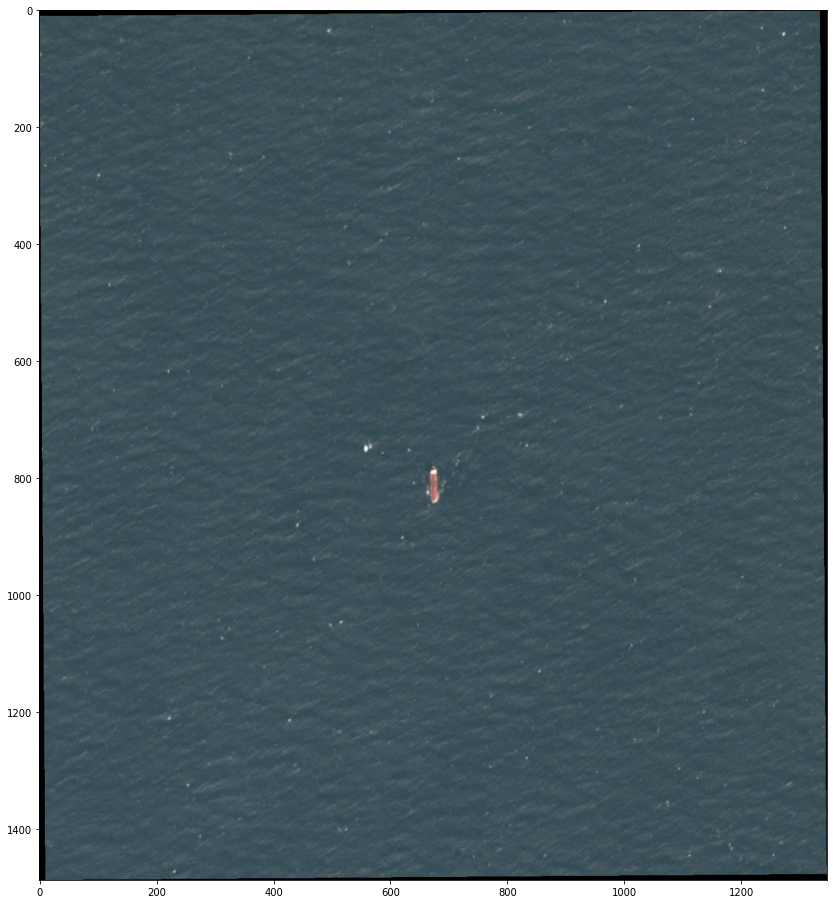

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(data[:,:,[2,1,0]])